In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
players = pd.read_csv("../data/fifa_22_player/players_22.csv")
players.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [3]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [4]:
players = players.dropna(subset=features)

In [5]:
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


#### Steps
1. Scale the data
2. Randomly select centroids (means)
3. Assign each data points to their closed centroid
4. Updated the centroids of the newly formed clusters
5. Repeats steps 3 and 4 until the same centoids (convergences)

In [6]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [7]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
overall,19165.0,4.670472,1.346635,1.0,3.739130,4.717391,5.500000,10.0
potential,19165.0,5.319998,1.191076,1.0,4.521739,5.304348,6.086957,10.0
wage_eur,19165.0,1.219443,0.501528,1.0,1.012876,1.064378,1.193133,10.0
value_eur,19165.0,1.131826,0.353229,1.0,1.021620,1.044817,1.092370,10.0
age,19165.0,4.063345,1.575838,1.0,2.666667,4.000000,5.333333,10.0


In [8]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [9]:
# Getting one random centroid from the data
centroid = data.apply(lambda x: float(x.sample())) # float 
centroid

overall      3.739130
potential    3.739130
wage_eur     1.038627
value_eur    1.015820
age          2.333333
dtype: float64

In [10]:
# Randomly select centroids 
def random_centroids(data, K):
    centroids = []
    for k_i in range(K):
        centroid = data.apply(lambda x: float(x.sample())) # float 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,3.739130,3.739130,4.913043,3.739130,4.521739
potential,4.326087,4.130435,6.086957,8.434783,8.239130
wage_eur,2.248927,1.005150,1.630901,1.012876,1.064378
value_eur,1.020460,1.009789,1.016980,1.055255,1.032058
age,4.333333,5.333333,7.333333,5.333333,2.000000


In [11]:
np.sqrt(((data - centroids.iloc[:, 0]) ** 2).sum(axis=1))

0        11.655904
1        11.382311
2        10.302765
3        11.284172
4        12.405307
           ...    
19234     4.279204
19235     4.047599
19236     4.058639
19237     3.985652
19238     3.985652
Length: 19165, dtype: float64

In [12]:
# Assign each data points to their closest centroid
def assign_cluster_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

cluster_labels = assign_cluster_labels(data, centroids)
cluster_labels[:10]

0    2
1    2
2    2
3    2
4    2
5    3
6    4
7    2
8    2
9    2
dtype: int64

In [13]:
for cluster_label, cluster_data_points in  data.groupby(cluster_labels):
    print(f"Cluster Name: {cluster_label}")
    print(f"Cluster {cluster_label} Data Points\n {cluster_data_points[:2]}\n")

Cluster Name: 0
Cluster 0 Data Points
        overall  potential  wage_eur  value_eur  age
1374  6.673913   6.282609  1.862661   1.393931  4.0
1376  6.673913   6.282609  1.733906   1.347537  4.0

Cluster Name: 1
Cluster 1 Data Points
        overall  potential  wage_eur  value_eur       age
2617  6.086957   5.695652  1.218884   1.148043  4.666667
2675  6.086957   5.695652  1.141631   1.148043  4.666667

Cluster Name: 2
Cluster 2 Data Points
      overall  potential  wage_eur  value_eur       age
0  10.000000   9.608696  9.227468   4.618307  7.000000
1   9.804348   9.413043  7.939914   6.543654  6.333333

Cluster Name: 3
Cluster 3 Data Points
       overall  potential  wage_eur  value_eur       age
5    9.608696   9.608696  4.334764   6.195700  5.000000
119  8.239130   8.043478  2.145923   2.971323  4.666667

Cluster Name: 4
Cluster 4 Data Points
      overall  potential  wage_eur  value_eur       age
6   9.608696  10.000000  6.909871   10.00000  3.000000
18  9.217391   9.217391  6.1373

In [14]:
# Updated the centroids of the newly formed clusters
def new_centroids(data, labels, K):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

new_centr = new_centroids(data, cluster_labels, 5)
new_centr

,0,1,2,3,4
overall,3.685466,4.410824,6.136218,6.596629,4.820626
potential,4.903170,4.140762,5.774169,6.968457,6.676692
wage_eur,1.074678,1.069837,1.475442,1.442442,1.246595
value_eur,1.043311,1.034304,1.228698,1.458183,1.208440
age,3.060000,5.230502,6.059185,4.432407,2.533293


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [16]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

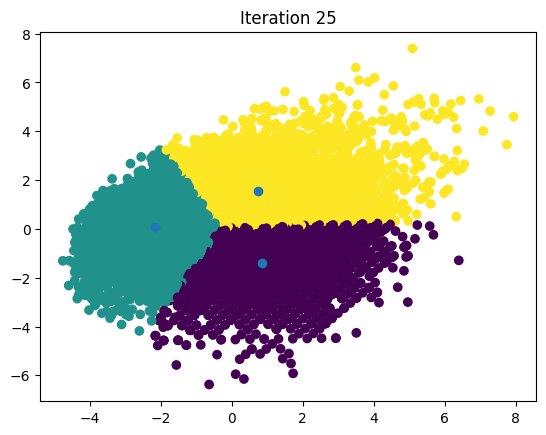

In [17]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()

iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = assign_cluster_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [18]:
centroids

,0,1,2
overall,4.781960,3.205672,5.807503
potential,4.506813,4.930905,6.497870
wage_eur,1.118498,1.028564,1.420500
value_eur,1.044909,1.026655,1.285685
age,5.467648,2.514741,3.598215


In [19]:
labels.value_counts()

0    7191
1    6209
2    5765
Name: count, dtype: int64

In [20]:
players[labels==0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


#### Comparing with Sci-kit learn

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [22]:
kmeans.cluster_centers_

array([[6.23537384, 6.62520466, 1.6590206 , 1.41481567, 4.14365411],
       [3.60559046, 5.20649676, 1.04014557, 1.03593993, 2.71696026],
       [4.80206142, 4.50337154, 1.11311486, 1.04000516, 5.61481708]])

In [23]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.235374,3.605590,4.802061
potential,6.625205,5.206497,4.503372
wage_eur,1.659021,1.040146,1.113115
value_eur,1.414816,1.035940,1.040005
age,4.143654,2.716960,5.614817


In [24]:
centroids

,0,1,2
overall,4.781960,3.205672,5.807503
potential,4.506813,4.930905,6.497870
wage_eur,1.118498,1.028564,1.420500
value_eur,1.044909,1.026655,1.285685
age,5.467648,2.514741,3.598215
